In [232]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Границы регионов Эфиопии (shapefile)
regions = gpd.read_file('eth_adm_csa_bofedb_2021_shp/eth_admbnda_adm1_csa_bofedb_2021.shp')

print('Столбцы в датасете регионов:', regions.columns)

print('Значения в столбце ADM1_EN:')
regions['ADM1_EN']

Столбцы в датасете регионов: Index(['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_PCODE', 'ADM1_REF',
       'ADM1ALT1EN', 'ADM1ALT2EN', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn',
       'validTo', 'geometry'],
      dtype='object')
Значения в столбце ADM1_EN:


0             Addis Ababa
1                    Afar
2                  Amhara
3        Benishangul Gumz
4               Dire Dawa
5                 Gambela
6                  Harari
7                  Oromia
8                  Sidama
9                    SNNP
10                 Somali
11    South West Ethiopia
12                 Tigray
Name: ADM1_EN, dtype: object

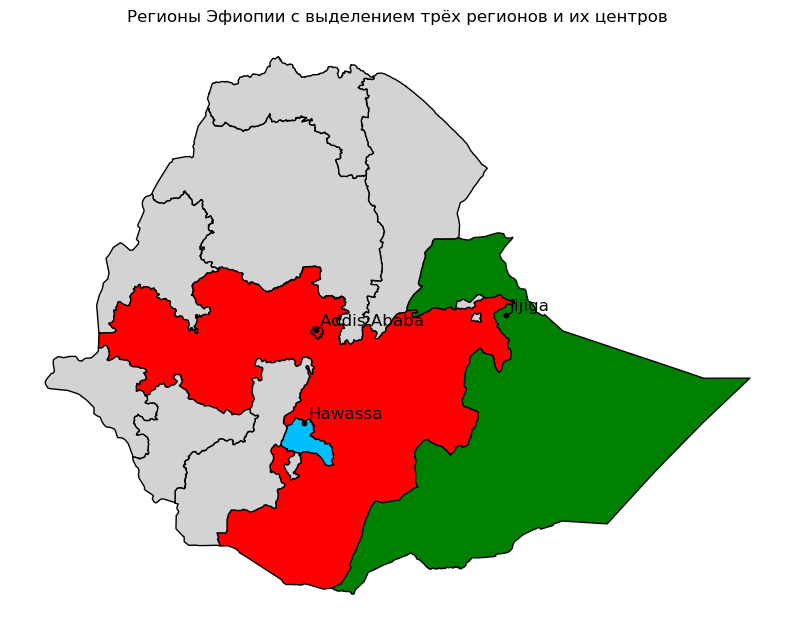

In [233]:
# Цвета для регионов
color_map = {
    'Somali': 'green',
    'Sidama': 'deepskyblue',
    'Oromia': 'red',
    'Addis Ababa': 'red'
}

region_col = 'ADM1_EN'

regions['color'] = regions[region_col].apply(lambda x: color_map[x] if x in color_map else 'lightgray')

# Координаты административных центров (примерные значения)
cities = gpd.GeoDataFrame({
    'city': ['Jijiga', 'Hawassa', 'Addis Ababa'],
    'region': ['Somali', 'Sidama', 'Addis Ababa'],
    'geometry': gpd.points_from_xy([42.8, 38.5, 38.75], [9.35, 7.05, 9.03])
})

# Визуализация
fig, ax = plt.subplots(1, figsize=(10, 8))
regions.plot(color=regions['color'], edgecolor='black', ax=ax)
cities.plot(ax=ax, color='black', marker='o', markersize=10, label='Admin Center')

# Добавить подписи к административным центрам
for idx, row in cities.iterrows():
    ax.annotate(row['city'], (row['geometry'].x, row['geometry'].y),
                xytext=(3,3), textcoords='offset points', fontsize=12)

plt.axis('off')
plt.title('Регионы Эфиопии с выделением трёх регионов и их центров')
plt.show()

## Практическая работа №1

Для выполнения практической работы №1 была выбрана страна Эфиопия и 3 административных центра: Сомали, Сидама и Оромия. 
Страна вызвала интерес, потому что чаще всего в кофейнях я беру фильтр, сваренный на зёрнах из Эфиопии (особенно хорошо пьётся Ethiopia Sidamo Guji и Ethiopia Acacia из этого же региона). Регион Сомали просто на слуху, в Оромии находится столица Ефиопии

| Города\Данные | Регион        | Широта (т) | Высота (т) | Широта (окр) | Высота (окр) | Часовой пояс | Площадь, км^2 | Население | Столица |
|---------------|---------------|------------|------------|--------------|--------------|--------------|---------------|-----------|---------|
| Jijiga        | Somali Region | 9.350000   | 42.800000  | 9.35         | 42.80        | UTC+3 (EAT)  | 3,069.4       | 486,822   | True    |
| Gode          | Somali Region | 5.952655   | 43.551579  | 5.95         | 43.55        | UTC+3 (EAT)  | 78.0          | 56,398    | False   |
| Werder        | Somali Region | 6.966667   | 45.333333  | 6.97         | 45.33        | UTC+3 (EAT)  | 6,195.7       | 88,281    | False   |
| Kebri Dehar   | Somali Region | 6.742500   | 44.286111  | 6.74         | 44.29        | UTC+3 (EAT)  | 13,516.0      | 183,729   | False   |
| Degahbur      | Somali Region | 8.214444   | 43.559167  | 8.21         | 43.56        | UTC+3 (EAT)  | 15.8          | 45,000    | False   |
| Hawassa       | Sidama Region | 7.062050   | 38.476350  | 7.06         | 38.48        | UTC+3 (EAT)  | 157.2         | 403,000   | True    |
| Yirgalem      | Sidama Region | 6.750000   | 38.417000  | 6.75         | 38.42        | UTC+3 (EAT)  | 22.4          | 43,815    | False   |
| Aleta Wendo   | Sidama Region | 6.600000   | 38.417000  | 6.60         | 38.42        | UTC+3 (EAT)  | 575.5         | 492,929   | False   |
| Hagere Selam  | Sidama Region | 6.483000   | 38.517000  | 6.48         | 38.52        | UTC+3 (EAT)  | 8.9           | 8,491     | False   |
| Bensa         | Sidama Region | 6.558333   | 38.146667  | 6.56         | 38.15        | UTC+3 (EAT)  | 11.3          | 25,000    | False   |
| Addis Ababa   | Oromia Region | 9.030000   | 38.740000  | 9.03         | 38.74        | UTC+3 (EAT)  | 527.0         | 3,273,000 | True    |
| Bole          | Oromia Region | 9.002400   | 38.799900  | 9.00         | 38.80        | UTC+3 (EAT)  | 122.1         | 328,900   | False   |
| Kirkos        | Oromia Region | 9.004200   | 38.758689  | 9.00         | 38.76        | UTC+3 (EAT)  | 14.6          | 235,441   | False   |
| Arada         | Oromia Region | 9.036000   | 38.752300  | 9.04         | 38.75        | UTC+3 (EAT)  | 9.9           | 226,000   | False   |
| Yeka          | Oromia Region | 9.013333   | 38.791667  | 9.01         | 38.79        | UTC+3 (EAT)  | 85.5          | 337,575   | False   |

## Организация данных

Здесь представлена организация данных в виде класса `CityBase`. С помощью классов и наследования можно указывать какие данные изменяемые, а которые нет (обеспечивается целостность и защита от случайных изменений неизменяемых важных параметров).

`NamedTuple` используется для удобства работы с данными

Далее будет проведён анализ занимаемой памяти для двух наборов данных с различными точностями высоты и широты городов

In [234]:
from typing import NamedTuple
from zoneinfo import ZoneInfo

In [255]:
# Класс для неизменяемой части информации о городе
class CityBase(NamedTuple):
    name: str
    region: str
    timezone: ZoneInfo = ZoneInfo("Africa/Addis_Ababa")
    is_capital: bool = False

# Класс для полной информации и анализа
class City:
    def __init__(self,
                 base: CityBase,
                 area: float,
                 population: int,
                 latitude: float | None = None,
                 longitude: float | None = None,
                 latitude_r: float | None = None,
                 longitude_r: float | None = None):
        self.base = base
        self.area = area
        self.population = population
        self.latitude = latitude
        self.longitude = longitude
        self.latitude_r = latitude_r
        self.longitude_r = longitude_r
        self.density = self.population / self.area


    def update_population(self, new_pop: int) -> None:
        self.population = new_pop
        self.density = self.population / self.area


    def update_area(self, new_area: float) -> None:
        self.area = new_area
        self.density = self.population / self.area


    # def __repr__(self):
    #     return f"{self.base.name} ({self.base.region}) - Население: {self.population} чел, Площадь: {self.area} км^2, Плотность: {self.density:.2f} чел/км^2"

In [236]:
# Пример кода для одного города
# | Jijiga        | Somali Region | 9.350000   | 42.800000  | 9.35         | 42.80        | UTC+3 (EAT)  | 3,069.4       | 486,822   | True    |
jijiga_base = CityBase(
    name='Jijiga',
    region='Somali Region',
    is_capital=True
)


jijiga = City(jijiga_base, latitude=9.350000, longitude=42.800000, latitude_r=9.35, longitude_r=42.80, population=486822, area=3069.4)

print(jijiga)

In [237]:
# Все города
cities_data = [
    City(CityBase("Jijiga", "Somali Region", True), latitude=9.350000, longitude=42.800000, latitude_r=9.35, longitude_r=42.80, area=3069.4, population=486822),
    City(CityBase("Gode", "Somali Region"), latitude=5.952655, longitude=43.551579, latitude_r=5.95, longitude_r=43.55, area=78.0, population=56398),
    City(CityBase("Werder", "Somali Region"), latitude=6.966667, longitude=45.333333, latitude_r=6.97, longitude_r=45.33, area=6195.7, population=88281),
    City(CityBase("Kebri Dehar", "Somali Region"), latitude=6.742500, longitude=44.286111, latitude_r=6.74, longitude_r=44.29, area=13516.0, population=183729),
    City(CityBase("Degahbur", "Somali Region"), latitude=8.214444, longitude=43.559167, latitude_r=8.21, longitude_r=43.56, area=15.8, population=45000),

    City(CityBase("Hawassa", "Sidama Region", True), latitude=7.062050, longitude=38.476350, latitude_r=7.06, longitude_r=38.48, area=157.2, population=403000),
    City(CityBase("Yirgalem", "Sidama Region"), latitude=6.750000, longitude=38.417000, latitude_r=6.75, longitude_r=38.42, area=22.4, population=43815),
    City(CityBase("Aleta Wendo", "Sidama Region"), latitude=6.600000, longitude=38.417000, latitude_r=6.60, longitude_r=38.42, area=575.5, population=492929),
    City(CityBase("Hagere Selam", "Sidama Region"), latitude=6.483000, longitude=38.517000, latitude_r=6.48, longitude_r=38.52, area=8.9, population=8491),
    City(CityBase("Bensa", "Sidama Region"), latitude=6.558333, longitude=38.146667, latitude_r=6.56, longitude_r=38.15, area=11.3, population=25000),

    City(CityBase("Addis Ababa", "Oromia Region", True), latitude=9.030000, longitude=38.740000, latitude_r=9.03, longitude_r=38.74, area=527.0, population=3273000),
    City(CityBase("Bole", "Oromia Region"), latitude=9.002400, longitude=38.799900, latitude_r=9.00, longitude_r=38.80, area=122.1, population=328900),
    City(CityBase("Kirkos", "Oromia Region"), latitude=9.004200, longitude=38.758689, latitude_r=9.00, longitude_r=38.76, area=14.6, population=235441),
    City(CityBase("Arada", "Oromia Region"), latitude=9.036000, longitude=38.752300, latitude_r=9.04, longitude_r=38.75, area=9.9, population=226000),
    City(CityBase("Yeka", "Oromia Region"), latitude=9.013333, longitude=38.791667, latitude_r=9.01, longitude_r=38.79, area=85.5, population=337575),
]

city_dict = {city.base.name: city for city in cities_data}

### Анализ занимаемой памяти

Проверим, сколько занимает памяти хранение координат с округлением до 2х знаков после запятой и с неокруглённым значением

In [238]:
# | Hawassa       | Sidama Region | 7.062050   | 38.476350  | 7.06         | 38.48        | UTC+3 (EAT)  | 157.2         | 403,000   | True    |

hawassa_base = CityBase(
    name='Hawassa',
    region='Sidama Region',
    is_capital=True
)

# Без округления
hawassa = City(hawassa_base, area=157.2, population=403000, latitude=7.062050, longitude=38.476350)
# С округлением
hawassa_r = City(hawassa_base, area=157.2, population=403000, latitude_r=7.06, longitude_r=38.48)

In [239]:
%pip install pympler

Note: you may need to restart the kernel to use updated packages.


In [240]:
import sys
from pympler import asizeof

print(f'Без округления при помощи sys.getsizeof: {sys.getsizeof(hawassa)}')
print(f'C округлением при помощи sys.getsizeof: {sys.getsizeof(hawassa_r)}')

print(f'Без округления при помощи asizeof.asizeof: {asizeof.asizeof(hawassa)}')
print(f'C округлением при помощи asizeof.asizeof: {asizeof.asizeof(hawassa_r)}')

Без округления при помощи sys.getsizeof: 48
C округлением при помощи sys.getsizeof: 48
Без округления при помощи asizeof.asizeof: 1208
C округлением при помощи asizeof.asizeof: 1208


Как можно заметить, что оба объекта занимают одинаковое количество памяти.
`sys.getsizeof()` возвращает занимаемую память обёртки `City`
`asizeof.asizeof()` возвращает память вложенных в `City` объктов

Так вышло, потому что в обоих случаях находятся объекты типа `float`, Python выделяет одинаковое количество памяти для типа `float` вне зависимости от количества знаков после запятой 

Экономия памяти возможна только при смене типа хранения — например, хранить координаты как строки или в типе `np.float16/np.float32` 

## Анализ плотности населения и расстояний

Расчёт плотность населения , расстояний от столицы страны до городов, расстояний от столиц республик до городов в её составе
Плотность `density` уже посчитана в классе `City` для простоты работы 

In [241]:
#
print('Плотность населения в городах:')
for city in cities_data:
    print(f'{city.base.name}: {city.density:.2f} чел/км^2')

Плотность населения в городах:
Jijiga: 158.60 чел/км^2
Gode: 723.05 чел/км^2
Werder: 14.25 чел/км^2
Kebri Dehar: 13.59 чел/км^2
Degahbur: 2848.10 чел/км^2
Hawassa: 2563.61 чел/км^2
Yirgalem: 1956.03 чел/км^2
Aleta Wendo: 856.52 чел/км^2
Hagere Selam: 954.04 чел/км^2
Bensa: 2212.39 чел/км^2
Addis Ababa: 6210.63 чел/км^2
Bole: 2693.69 чел/км^2
Kirkos: 16126.10 чел/км^2
Arada: 22828.28 чел/км^2
Yeka: 3948.25 чел/км^2


In [242]:
import numpy as np
from typing import Tuple


def calculate_distance(city1: Tuple[float, float],
                       city2: Tuple[float, float],
                       r: int = 6378) -> float:
    '''
    Функция для рассчёта расстояния между двумя точками (известны их координаты) с использованием формулы гаверсинуса
    В качестве r взят радиус Земли
    '''

    # распакуем координаты
    lon1, lat1 = city1[0], city1[1]
    lon2, lat2 = city2[0], city2[1]

    def haversinus(l1: float, l2: float) -> float:
        '''
        Формула гаверсинуса
        '''
        res = np.sin((l2 - l1) / 2) ** 2
        return res

    calc_under_sqrt = haversinus(lon2, lon1) + np.cos(lon1) * np.cos(lon2) * haversinus(lat2, lat1)
    d = 2 * r * np.arcsin(np.sqrt(calc_under_sqrt))

    return d

In [244]:
# Посчитаем расстояние по прямой (в км) от столицы страны до каждого из выбранных городов
# Столица Addis Ababa
import numpy as np
from typing import Tuple, List


def lon_lat_to_rad(city_name: str, rounded: bool = False) -> Tuple[float, float]:
        '''
        Переводит широту и высоту из градусов в радианы
        '''
        # Объект города
        city_obj = city_dict[city_name]

        if rounded:
             lat = city_obj.latitude_r
             lon = city_obj.longitude_r
        else:
             lat = city_obj.latitude
             lon = city_obj.longitude

        return np.radians(lon), np.radians(lat)


def calc_distance_to_capital(capital: str, region_filter: str = None, rounded: bool = False) -> List[Tuple]:
    capital_rad = lon_lat_to_rad(capital)
    distances_to_capital = {}  # city.name: distance

    for city_name in city_dict.keys():
        # пропускаем столицу
        if city_name == capital:
            continue
        # если есть фильтрация по региону
        if region_filter and city_dict[city_name].base.region != region_filter:
            continue

        # переводим в радианы
        city_rad = lon_lat_to_rad(city_name)
        distance = calculate_distance(capital_rad, city_rad)

        distances_to_capital[city_name] = distance

    # сортировка по убыванию расстояния до столицы
    sorted_distances_to_capital = sorted(distances_to_capital.items(), key=lambda x: x[1], reverse=True)

    return sorted_distances_to_capital


distance_to_addis_ababa = calc_distance_to_capital('Addis Ababa')
# выводим на печать
for city, distance in distance_to_addis_ababa:
    print(f'Расстояние от столицы до {city} - {distance} км')


Расстояние от столицы до Werder - 753.4406115093412 км
Расстояние от столицы до Kebri Dehar - 646.0755748417396 км
Расстояние от столицы до Gode - 594.3800313591844 км
Расстояние от столицы до Degahbur - 540.7853627602415 км
Расстояние от столицы до Jijiga - 452.7507849560434 км
Расстояние от столицы до Bensa - 225.38086402242988 км
Расстояние от столицы до Hagere Selam - 222.8715540850414 км
Расстояние от столицы до Aleta Wendo - 214.49312468581402 км
Расстояние от столицы до Yirgalem - 201.63741075213258 км
Расстояние от столицы до Hawassa - 173.67939540637826 км
Расстояние от столицы до Bole - 7.085111212858595 км
Расстояние от столицы до Yeka - 5.930559507074123 км
Расстояние от столицы до Kirkos - 3.0569499218559826 км
Расстояние от столицы до Arada - 1.4649443431397466 км


In [245]:
# Расстояния от столицы республики до каждого другого города в её составе
capitals_with_regions = [
    ('Jijiga', 'Somali Region'),
    ('Hawassa', 'Sidama Region'),
    ('Addis Ababa', 'Oromia Region')
]

for capital, region in capitals_with_regions:
    distances = calc_distance_to_capital(capital, region_filter=region)
    for city_name, distance in sorted(distances, key=lambda x: x[1], reverse=True):
        print(f'Расстояние от столицы {capital} до {city_name} ({region}) - {distance} км')

Расстояние от столицы Jijiga до Werder (Somali Region) - 340.35378682126213 км
Расстояние от столицы Jijiga до Gode (Somali Region) - 288.17834078640664 км
Расстояние от столицы Jijiga до Kebri Dehar (Somali Region) - 267.62060481883316 км
Расстояние от столицы Jijiga до Degahbur (Somali Region) - 125.0509548908643 км
Расстояние от столицы Hawassa до Bensa (Sidama Region) - 57.29380672663185 км
Расстояние от столицы Hawassa до Hagere Selam (Sidama Region) - 50.650265254231485 км
Расстояние от столицы Hawassa до Aleta Wendo (Sidama Region) - 40.82063448297922 км
Расстояние от столицы Hawassa до Yirgalem (Sidama Region) - 27.99587733104276 км
Расстояние от столицы Addis Ababa до Bole (Oromia Region) - 7.085111212858595 км
Расстояние от столицы Addis Ababa до Yeka (Oromia Region) - 5.930559507074123 км
Расстояние от столицы Addis Ababa до Kirkos (Oromia Region) - 3.0569499218559826 км
Расстояние от столицы Addis Ababa до Arada (Oromia Region) - 1.4649443431397466 км


In [251]:
# Проведём измерения точности расстояния для двух наборов данных (полные координаты и округлённые)
# на примере расстояния до столицы Эфиопии
def measure_distance_precision(capital: str, region_filter: str = None):
    # Вычисляем расстояния с полной точностью
    dist_high = calc_distance_to_capital(capital, region_filter=region_filter, rounded=False)
    # Вычисляем расстояния с округлённой точностью
    dist_low = calc_distance_to_capital(capital, region_filter=region_filter, rounded=True)

    # Преобразуем списки кортежей в словари для удобного поиска
    dist_high_dict = dict(dist_high)
    dist_low_dict = dict(dist_low)

    cities = dist_high_dict.keys()

    losses = []
    for city in cities:
        high_val = dist_high_dict[city]
        low_val = dist_low_dict.get(city, None)
        if low_val is None:
            continue  # если для города нет значения в низкоточных — пропускаем
        abs_loss = abs(high_val - low_val)
        rel_loss = (abs_loss / high_val) * 100 if high_val != 0 else 0
        losses.append((city, abs_loss, rel_loss))

    max_loss_city = max(losses, key=lambda x: x[1])
    avg_abs_loss = sum(l[1] for l in losses) / len(losses)
    avg_rel_loss = sum(l[2] for l in losses) / len(losses)

    print(f"Максимальная абсолютная потеря точности: {max_loss_city[1]} км в городе {max_loss_city[0]}")
    print(f"Средняя абсолютная потеря точности: {avg_abs_loss} км")
    print(f"Средняя относительная потеря точности: {avg_rel_loss}%")

# Пример вызова функции
measure_distance_precision('Addis Ababa')


Максимальная абсолютная потеря точности: 0.0 км в городе Werder
Средняя абсолютная потеря точности: 0.0 км
Средняя относительная потеря точности: 0.0%


### Анализ полученных данных (плотность населения и расстояния)

**Город, наиболее удалённый от столицы страны** -- Werder (расстояние 753.44 км)

**Города, наиболее удалённые от столицы своей республики**:
    - Somali Region: Werder (расстоние 340.35 км)
    - Sidama Region: Bensa (расстоние 57.29 км)
    - Oromia Region: Bole (расстоние 7.09 км)

**Зависимость численности населения от удалённости от столицы**
В целом наблюдается обратная корреляция: чем дальше город от столицы, тем в среднем меньше плотность и численность населения

Исключение — крупные агломерации, близкие к столице (Addis Ababa) с очень высокой плотностью (например, Kirkos и Arada с плотностью более 16000 чел/км^2)

Это типично для централизованных государств и связано с экономическими, историческими факторами концентрации деятельности в столице

**Формула гаверсинуса**
Расчёт расстояний произведён по формуле гаверсинуса -- она учитывает кривизну Земли и подходит для вычисления больших расстояний

Координаты оптимально хранить в градусах (человекочитаемый формат и распространённый стандарт)

При расчётах они переводятся в радианы (через numpy.radians) -- это и есть оптимальная практика для тригонометрических функций numpy 

**Измерения точности расстояния для двух наборов данных (полные координаты и округлённые)**
Получилось так, что и максимальная абсолютная потеря, и средние аобсолютные и относительные потери равны 0%, поэтому для подсчёта расстояния между двумя координатами не так важна точность (== количество знаков после запятой) данных. Но и это тоже не важно, потому что и точные, и округлённые координаты занимают одинаковое количество памяти)

## Анализ часовых поясов

На самом деле все города Эфиопии находятся в одном часовом поеся (вся страна находится в часовом поясе UTC+3, в таком же, что и Москва), но на всякий случай проведу анализ часовых поясов

In [256]:
from collections import defaultdict


# группировка городов по региону и определение уникальных часовых поясов в каждом регионе
timezones_by_region = defaultdict(set)
for city in cities_data:
    tz_name = str(city.base.timezone)
    timezones_by_region[city.base.region].add(tz_name)

# печатаем результат
print("Часовые пояса в регионах:")
for region, tzs in timezones_by_region.items():
    print(f"{region}: {tzs}")

# проверка совпадения часовых поясов между городами из разных регионов
tz_to_regions = defaultdict(set)
for city in cities_data:
    tz_name = str(city.base.timezone)
    tz_to_regions[tz_name].add(city.base.region)

# печатаем результат
print("\nЧасовые пояса, общие для разных регионов:")
for tz, regions in tz_to_regions.items():
    if len(regions) > 1:
        print(f"{tz}: {regions}")

Часовые пояса в регионах:
Somali Region: {'Africa/Addis_Ababa', 'True'}
Sidama Region: {'Africa/Addis_Ababa', 'True'}
Oromia Region: {'Africa/Addis_Ababa', 'True'}

Часовые пояса, общие для разных регионов:
True: {'Oromia Region', 'Sidama Region', 'Somali Region'}
Africa/Addis_Ababa: {'Oromia Region', 'Sidama Region', 'Somali Region'}


Сделать вывод о том, существует ли корреляция между долготой города и его часовым поясом, невозможно, потому что всего города Эфиопии находятся в одном часовом поясе. 

Однозначно определить часовые пояса по координатам невозможно, потому что часовые пояса -- административные зоны, а не географические. Часто часовые пояса не совпадают с широтами. Разные регионы или республики могут использовать один и тот же часовой пояс, хотя находятся в разных географических широтах и долготах

## Анализ структур данных

Для хранения данных о городах я выбрала использовать классы `CityBase` и `City`, для изменяемых данных, такие как население (`population`), площадь (`area`) и плотность населения (`density`) были написаны соответсвующие методы для их обновления (`density` обновляется как только обновится либо `population`, либо `area`, либо сразу два атрибута) 

Неизменяемые атрибуты используются для константных данных (название города, регион, часовой пояс), чтобы защитить от случайных изменений

Изменяемые атрибуты (например, площадь, население) реализованы как свойства классов и могут обновляться со временем

In [259]:
# Попытаемя изменить неизменяемое поле
try:
    city_sample = cities_data[0]
    print(f"\nПопытка изменить название города {city_sample.base.name}...")
    city_sample.base.name = "Новое имя"
except Exception as e:
    print(f"Ошибка при изменении неизменяемого поля: {e}")


Попытка изменить название города Jijiga...
Ошибка при изменении неизменяемого поля: can't set attribute


## Ответы на вопросы

#### 1. Почему в некоторых республиках все города находятся в одном часовом поясе, а в других — нет? Как это связано с их географическим положением?

Если республика по размеру компактна и расположена вдоль узкой широты, все города могут находиться в одном часовом поясе (как все регионы в Эфиопии)

В более протяжённых или территориально растянутых республиках (широкая протяжённость по долготе) города могут принадлежать к разным поясам или регионам с разным временем (как в России)

#### 2. Может ли город, расположенный западнее другого, иметь более позднее местное время? Приведите пример из ваших данных и объясните причину. (если подобный факт свершился для вашей выборки)

Да, это возможно. Обычно время ориентируется на географическую долготу, но административные границы, экономические и политические факторы влияют на фактическое время. Как уже объяснила выше, часовые пояса не всегда строго следуют долготам, они задаются административно

#### 3.  Если наименование города и часовой пояс назначены изменяемыми, приведите обоснование (например, анализ частоты изменения данных параметров за последние годы)

В моей выборке не назначены, но такое возможно (пример Санкт-Петербург --> Петроград --> Ленинград --> Санкт-Петербург)

#### 4. Почему использование определённых типов данных предотвращает логические ошибки в геоанализе?

Использование неизменяемых структур данных для базовых атрибутов защищает эти критически важные поля от случайных или непреднамеренных изменений. Это гарантирует целостность и консистентность геоданных, предотвращая ошибки при анализе

Изменяемые поля для динамических данных позволяют корректировать реальные изменения во времени

#### 5. Можно ли считать, что часовой пояс является функцией от долготы? На основе ваших данных (если не попали в выборку, то нужно рассмотреть внешние источники) дайте аргументированный ответ с примерами отклонений

Часовой пояс не является строгой функцией от долготы, так как это административный и политический параметр

Встречаются случаи, когда одинаковый пояс используется в регионах с разной долготой, а города с близкой долготой могут иметь разный часовой пояс

Могу привести пару примеров: 
- В Эфиопии город Werder находится на долготе 45.33 градуса, город Bensa -- 38.15 градусов, разница между ними составляет 7.18 градусов, но при этом они находятся в одном часовом поясе (UTC+3)
- Город Vigo в Испании расположен на долготе -8.72 градусов, город Valenca в Португалии -- -8.64 градусов. Разница между их долготами составляет всего 0.08 градусов, но при это они находятся в разных часовых поясах (Испания UTC+1, Португалия UTC+0)
